In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
url = "https://raw.githubusercontent.com/ludwigenvall/churn-prediction-dl/refs/heads/main/data/processed_telco.csv"
df = pd.read_csv(url)

# Preview
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Download the generative_model.py script from your GitHub repo
! wget https://raw.githubusercontent.com/ludwigenvall/churn-prediction-dl/refs/heads/main/scripts/generative_model.py

from generative_model import fit_and_simulate


--2025-05-29 13:33:10--  https://raw.githubusercontent.com/ludwigenvall/churn-prediction-dl/refs/heads/main/scripts/generative_model.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3651 (3.6K) [text/plain]
Saving to: ‘generative_model.py’

generative_model.py 100%[===================>]   3.57K  --.-KB/s    in 0s      

2025-05-29 13:33:10 (34.4 MB/s) - ‘generative_model.py’ saved [3651/3651]



In [3]:
# Run the Bayesian generative simulation
simulated_df = fit_and_simulate(df)



Output()

In [4]:

# Preview simulated behavior
simulated_df.head()

,customerID,Churn,logins_seq,support_seq,data_seq
0,7590-VHVEG,No,"[7, 5, 4, 5, 7, 8, 4, 10, 6, 6, 7, 5, 4, 3, 9,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4.788659808370757, 1.2460382404976535, 7.5874..."
1,5575-GNVDE,No,"[5, 7, 4, 7, 10, 4, 3, 4, 6, 8, 6, 3, 7, 6, 12...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[2.091994766958651, 6.389058701472562, 4.82998..."
2,3668-QPYBK,Yes,"[2, 4, 4, 1, 2, 2, 2, 5, 2, 6, 5, 1, 5, 4, 6, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.4163703403942219, 2.59876683226151, 2.60135..."
3,7795-CFOCW,No,"[5, 4, 7, 5, 9, 6, 7, 9, 7, 8, 2, 6, 2, 1, 5, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[12.245480584726993, 7.549669669985751, 5.3885..."
4,9237-HQITU,Yes,"[1, 3, 1, 4, 2, 5, 0, 6, 3, 1, 3, 2, 2, 1, 4, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...","[1.5108654134638828, 4.399844713803853, 4.7688..."


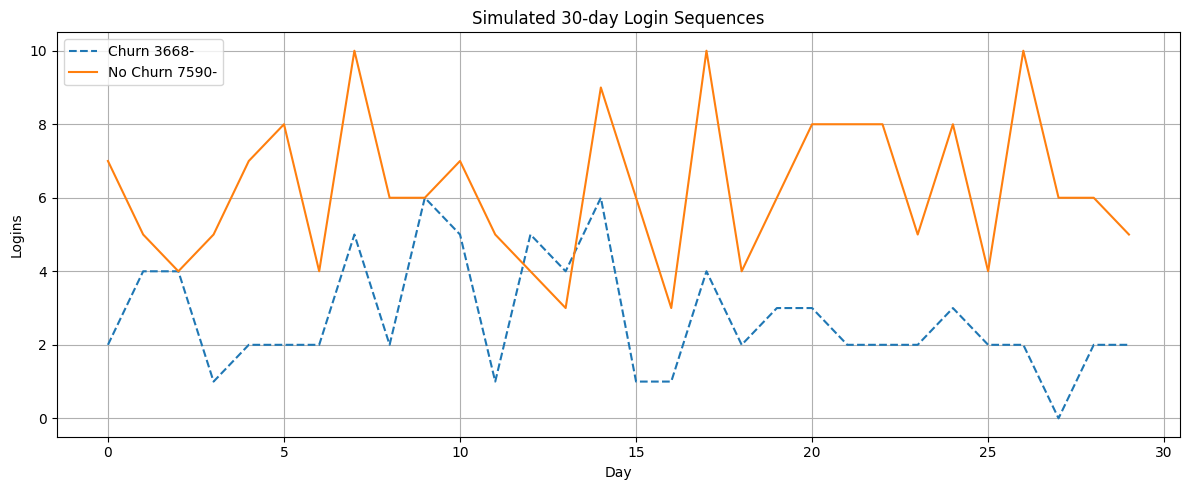

In [13]:


# Choosing 5 customers who churn and 5 who dont churn
churned = simulated_df[simulated_df['Churn'] == 'Yes'].head(1)
not_churned = simulated_df[simulated_df['Churn'] == 'No'].head(1)

# Creating figure
plt.figure(figsize=(12, 5))

# Logins for churn customers
for i, row in churned.iterrows():
    plt.plot(row['logins_seq'], label=f"Churn {row['customerID'][:5]}", linestyle='--')

# Logins for non churn customers
for i, row in not_churned.iterrows():
    plt.plot(row['logins_seq'], label=f"No Churn {row['customerID'][:5]}")

# Figure settings
plt.title("Simulated 30-day Login Sequences")
plt.xlabel("Day")
plt.ylabel("Logins")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


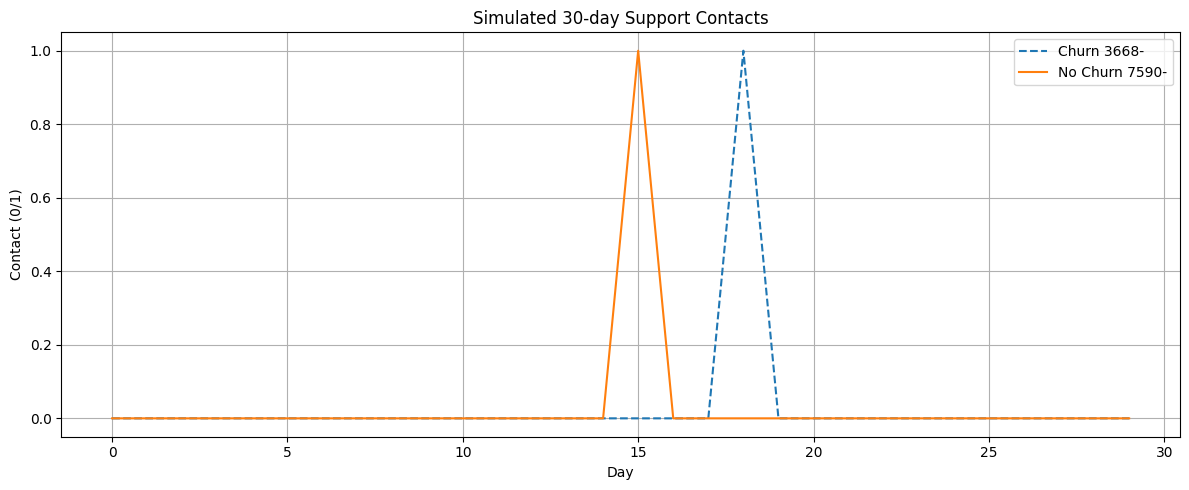

In [11]:
# Creating figure
plt.figure(figsize=(12, 5))

#Plotting support sequence for churn customers
for i, row in churned.iterrows():
    plt.plot(row['support_seq'], label=f"Churn {row['customerID'][:5]}", linestyle='--')

#Plotting support sequence for non-churn customers
for i, row in not_churned.iterrows():
    plt.plot(row['support_seq'], label=f"No Churn {row['customerID'][:5]}")

#Figure settings
plt.title("Simulated 30-day Support Contacts")
plt.xlabel("Day")
plt.ylabel("Contact (0/1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


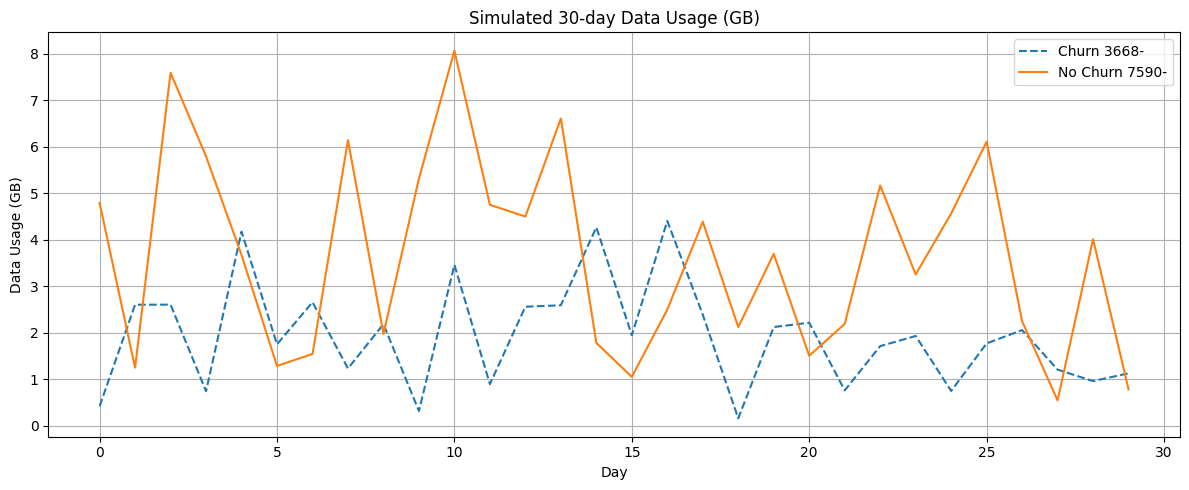

In [9]:
plt.figure(figsize=(12, 5))

for i, row in churned.iterrows():
    plt.plot(row['data_seq'], label=f"Churn {row['customerID'][:5]}", linestyle='--')

for i, row in not_churned.iterrows():
    plt.plot(row['data_seq'], label=f"No Churn {row['customerID'][:5]}")

plt.title("Simulated 30-day Data Usage (GB)")
plt.xlabel("Day")
plt.ylabel("Data Usage (GB)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
simulated_df.to_csv("simulated_behavior.csv", index=False)
from google.colab import files
files.download("simulated_behavior.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>